In [2]:
# this file is for predicting renewable energy in future.

In [3]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sumit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sumit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\Sumit\AppData\Local\Temp\ipykernel_8628\1756091934.py:35: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range('2025-12-31', '2030-12-31', freq='Y')


        Date  PredictedTotalRenewable
0 2025-12-31            256057.554469
1 2026-12-31            255646.476850
2 2027-12-31            255235.399230
3 2028-12-31            254823.195371
4 2029-12-31            254412.117751
5 2030-12-31            254001.040132


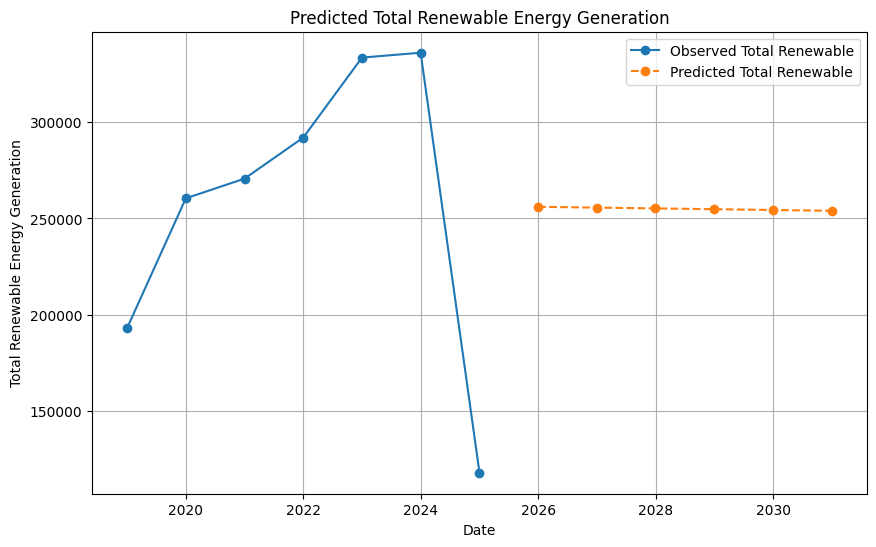

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
data = {
    'Date': ['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31', '2024-12-31'],
    'SolarGen': [None, 43219.0000, 53054.0000, 65292.0000, 88956.0000, 105399.8670, 71647.3789],
    'WindGen': [56199.000, 57428.000, 53237.000, 64328.000, 69223.000, 79448.989, 46314.673],
    'HydroGen': [136905.00000, 159799.00000, 164436.00000, 162418.00000, 175381.00000, 151236.15665, None]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing values in SolarGen and HydroGen with 0 (assuming missing values are 0)
df = df.fillna(0)

# Calculate total renewable energy generation
df['TotalRenewable'] = df['SolarGen'] + df['WindGen'] + df['HydroGen']

# Prepare the data for the model
X = np.array((df['Date'] - df['Date'].min()).dt.days).reshape(-1, 1)
y = df['TotalRenewable'].values

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_dates = pd.date_range('2025-12-31', '2030-12-31', freq='Y')
future_X = np.array((future_dates - df['Date'].min()).days).reshape(-1, 1)
future_predictions = model.predict(future_X)

# Print future predictions
future_df = pd.DataFrame({'Date': future_dates, 'PredictedTotalRenewable': future_predictions})
print(future_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['TotalRenewable'], label='Observed Total Renewable', marker='o')
plt.plot(future_df['Date'], future_df['PredictedTotalRenewable'], label='Predicted Total Renewable', marker='o', linestyle='--')

# Add titles and labels
plt.title('Predicted Total Renewable Energy Generation')
plt.xlabel('Date')
plt.ylabel('Total Renewable Energy Generation')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
